In [1]:
# Install necessary libraries for data processing, Spark, and deep learning
!pip install pyspark
!pip install pandas
!pip install tensorflow
!pip install vaderSentiment
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Import the libraries we will use
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year, month, udf
from pyspark.sql.types import FloatType
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries are installed and imported successfully!")

✅ All libraries are installed and imported successfully!


In [2]:
# Install the necessary library for downloading stock data
!pip install yfinance

import pandas as pd
import yfinance as yf
from datetime import datetime

def download_aligned_big_data_stocks():
    """
    Downloads and preprocesses a comprehensive stock market dataset with a timeline
    aligned to the historical news data (2009-2020).
    """

    major_stocks = [
        'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
        'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
        'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
        'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
        'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
        'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
        'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
    ]

    start_date = "2009-01-01"
    end_date = "2020-12-31"

    print(f"🔄 Downloading ALIGNED Big Data: {len(major_stocks)} stocks from {start_date} to {end_date}")

    all_data = []
    for i, symbol in enumerate(major_stocks):
        try:
            print(f"📈 Processing {symbol} ({i+1}/{len(major_stocks)})")
            stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

            if not stock_data.empty:
                stock_data.reset_index(inplace=True)
                stock_data['Symbol'] = symbol

                # Pre-calculate technical indicators
                stock_data['Daily_Return'] = stock_data['Close'].pct_change()
                stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std()
                stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
                stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
                stock_data['Volume_MA'] = stock_data['Volume'].rolling(window=20).mean()

                all_data.append(stock_data)

        except Exception as e:
            print(f"⚠️ Failed to download {symbol}: {e}")

    combined_data = pd.concat(all_data, ignore_index=True)

    # --- KEY CHANGE: The aggressive dropna() line has been removed ---
    # combined_data.dropna(inplace=True)

    print("\n✅ ALIGNED BIG DATASET CREATED SUCCESSFULLY:")
    print(f"📊 Total records: {len(combined_data):,}")
    print(f"🏢 Total unique stocks: {combined_data['Symbol'].nunique()}")
    print(f"📅 Date range: {combined_data['Date'].min().date()} to {combined_data['Date'].max().date()}")

    return combined_data

# --- Execute the function and save the data ---
stock_data = download_aligned_big_data_stocks()
stock_data.to_csv('big_stock_data_aligned.csv', index=False)
print("\n💾 File 'big_stock_data_aligned.csv' has been saved. It should now contain all the records.")

🔄 Downloading ALIGNED Big Data: 80 stocks from 2009-01-01 to 2020-12-31
📈 Processing AAPL (1/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MSFT (2/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GOOGL (3/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMZN (4/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing META (5/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TSLA (6/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NVDA (7/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NFLX (8/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ADBE (9/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CRM (10/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing INTC (11/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMD (12/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ORCL (13/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing IBM (14/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CSCO (15/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing QCOM (16/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TXN (17/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AVGO (18/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MU (19/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PYPL (20/80)
📈 Processing JPM (21/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BAC (22/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing WFC (23/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing C (24/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GS (25/80)
📈 Processing MS (26/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AXP (27/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing V (28/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MA (29/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BLK (30/80)
📈 Processing SCHW (31/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing USB (32/80)
📈 Processing PNC (33/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TFC (34/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing COF (35/80)
📈 Processing BK (36/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing STT (37/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing FITB (38/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing RF (39/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing SPGI (40/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing JNJ (41/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing UNH (42/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PFE (43/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ABT (44/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TMO (45/80)
📈 Processing DHR (46/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing BMY (47/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ABBV (48/80)
📈 Processing LLY (49/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MRK (50/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing AMGN (51/80)
📈 Processing GILD (52/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing ISRG (53/80)
📈 Processing VRTX (54/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing REGN (55/80)
📈 Processing BIIB (56/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CVS (57/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CI (58/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing HUM (59/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MDT (60/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing WMT (61/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing HD (62/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PG (63/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing KO (64/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing PEP (65/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing MCD (66/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing NKE (67/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing SBUX (68/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing TGT (69/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing LOW (70/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing COST (71/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing DIS (72/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing CMCSA (73/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing VZ (74/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing T (75/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing F (76/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GM (77/80)
📈 Processing CL (78/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing KMB (79/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)


📈 Processing GIS (80/80)


/tmp/ipython-input-77153801.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date, progress=False)



✅ ALIGNED BIG DATASET CREATED SUCCESSFULLY:
📊 Total records: 237,110
🏢 Total unique stocks: 80
📅 Date range: 2009-01-02 to 2020-12-30

💾 File 'big_stock_data_aligned.csv' has been saved. It should now contain all the records.


In [3]:
import pandas as pd
import csv # Import the CSV library for robust file reading

# This is the same list of stocks from Step 1
major_stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
    'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
    'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
    'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
    'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
    'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
    'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
]

print("--- Starting Step 2 (Definitive Fix): Processing News Data ---")

# Use the exact file path you provided
file_path = '/content/analyst_ratings_processed.csv'
data_list = []

try:
    # 1. Robustly read the CSV file line-by-line to bypass pandas parsing errors
    print(f"📰 Robustly loading '{file_path}' to handle formatting errors...")
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        # The csv.reader will correctly handle fields that contain commas
        reader = csv.reader(file)
        # Skip the header row
        header = next(reader)

        for row in reader:
            # Ensure the row has the expected number of columns before processing
            if len(row) == 4:
                # The columns are: old_index, title, date, stock
                data_list.append({
                    'headline': row[1],
                    'date': row[2],
                    'Symbol': row[3]
                })

    # 2. Create a Pandas DataFrame from the cleaned list of dictionaries
    news_df = pd.DataFrame(data_list)
    print(f"✅ Successfully loaded and parsed {len(news_df):,} articles.")

    # 3. Process the 'date' column
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)
    news_df.dropna(subset=['date'], inplace=True) # Remove rows where date conversion failed

    # Extract just the date part for merging with our daily stock data
    news_df['Date'] = news_df['date'].dt.date
    news_df['Date'] = pd.to_datetime(news_df['Date'])

    # 4. Filter the news data to keep only articles for our stocks
    print(f"🔍 Filtering news to match the {len(major_stocks)} stocks...")
    filtered_news = news_df[news_df['Symbol'].isin(major_stocks)]
    print(f"📊 Found {len(filtered_news):,} relevant articles.")

    # 5. Finalize the dataset, keeping only essential columns
    final_news_df = filtered_news[['Date', 'Symbol', 'headline']]

    # 6. Save the cleaned and filtered data to a new file
    final_news_df.to_csv('filtered_news_data.csv', index=False)
    print("\n✅ NEWS DATA PREPARATION COMPLETE:")
    print("💾 A new file 'filtered_news_data.csv' has been created.")
    print("\nFinal News Data Head:")
    print(final_news_df.head())

except FileNotFoundError:
    print(f"\n⚠️ ERROR: '{file_path}' not found.")
    print("Please make sure the file is uploaded and the path is correct.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 2 (Definitive Fix): Processing News Data ---
📰 Robustly loading '/content/analyst_ratings_processed.csv' to handle formatting errors...
✅ Successfully loaded and parsed 1,397,891 articles.
🔍 Filtering news to match the 80 stocks...
📊 Found 101,090 relevant articles.

✅ NEWS DATA PREPARATION COMPLETE:
💾 A new file 'filtered_news_data.csv' has been created.

Final News Data Head:
           Date Symbol                                           headline
3664 2020-06-10   AAPL  Tech Stocks And FAANGS Strong Again To Start D...
3665 2020-06-10   AAPL      10 Biggest Price Target Changes For Wednesday
3666 2020-06-10   AAPL  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...
3667 2020-06-10   AAPL  Deutsche Bank Maintains Buy on Apple, Raises P...
3668 2020-06-10   AAPL  Apple To Let Users Trade In Their Mac Computer...


In [4]:
import pandas as pd
import yfinance as yf
from datetime import datetime

print("--- Starting Final Data Preparation (with Transformation) ---")

try:
    # --- Part A: Download all stock data in its native format ---
    major_stocks = [
        'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX', 'ADBE', 'CRM',
        'INTC', 'AMD', 'ORCL', 'IBM', 'CSCO', 'QCOM', 'TXN', 'AVGO', 'MU', 'PYPL',
        'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA', 'BLK',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'BK', 'STT', 'FITB', 'RF', 'SPGI',
        'JNJ', 'UNH', 'PFE', 'ABT', 'TMO', 'DHR', 'BMY', 'ABBV', 'LLY', 'MRK',
        'AMGN', 'GILD', 'ISRG', 'VRTX', 'REGN', 'BIIB', 'CVS', 'CI', 'HUM', 'MDT',
        'WMT', 'HD', 'PG', 'KO', 'PEP', 'MCD', 'NKE', 'SBUX', 'TGT', 'LOW',
        'COST', 'DIS', 'CMCSA', 'VZ', 'T', 'F', 'GM', 'CL', 'KMB', 'GIS'
    ]
    start_date = "2009-01-01"
    end_date = "2020-12-31"

    print(f"🔄 Part A: Downloading data for {len(major_stocks)} stocks...")
    # yfinance naturally creates a multi-level column structure when downloading multiple stocks
    stock_df_wide = yf.download(major_stocks, start=start_date, end=end_date)
    print("✅ Download complete.")

    # --- Part B: Transform the data from "wide" to "long" format ---
    print("🔧 Part B: Transforming data structure...")
    # The .stack() method pivots the stock symbols from the columns into the rows,
    # creating a long-format DataFrame. This is the key to solving the merge error.
    stock_df_long = stock_df_wide.stack()
    stock_df_long.index.names = ['Date', 'Symbol'] # Name the new index levels
    stock_df_long.reset_index(inplace=True) # Convert the index levels into columns
    print("✅ Transformation complete.")

    # --- Part C: Calculate Technical Indicators on the clean, long-format data ---
    print("📈 Part C: Calculating technical indicators...")
    # We must sort by Symbol and Date to ensure the rolling calculations are correct
    stock_df_long.sort_values(by=['Symbol', 'Date'], inplace=True)

    # Calculate indicators per stock group
    stock_df_long['Daily_Return'] = stock_df_long.groupby('Symbol')['Close'].pct_change()
    stock_df_long['Volatility'] = stock_df_long.groupby('Symbol')['Daily_Return'].rolling(window=20).std().reset_index(0,drop=True)
    stock_df_long['SMA_20'] = stock_df_long.groupby('Symbol')['Close'].rolling(window=20).mean().reset_index(0,drop=True)
    stock_df_long['SMA_50'] = stock_df_long.groupby('Symbol')['Close'].rolling(window=50).mean().reset_index(0,drop=True)
    stock_df_long['Volume_MA'] = stock_df_long.groupby('Symbol')['Volume'].rolling(window=20).mean().reset_index(0,drop=True)
    print("✅ Indicator calculation complete.")

    # --- Part D: Load and Merge News Data ---
    print("📂 Part D: Loading and merging news data...")
    news_df = pd.read_csv('filtered_news_data.csv')
    news_df['Date'] = pd.to_datetime(news_df['Date'])

    # Group news headlines
    news_grouped = news_df.groupby(['Date', 'Symbol'])['headline'].apply('. '.join).reset_index()

    # Merge the clean, long-format stock data with the news data
    combined_df = pd.merge(stock_df_long, news_grouped, on=['Date', 'Symbol'], how='left')
    combined_df['headline'].fillna("", inplace=True)
    print("✅ Merging complete.")

    # --- Part E: Final Cleaning and Saving ---
    print("🧹 Part E: Final cleaning...")
    rows_before = len(combined_df)
    combined_df.dropna(inplace=True)
    rows_after = len(combined_df)
    print(f"🗑️ Removed {rows_before - rows_after:,} initial rows with incomplete data.")

    # Save the master dataset
    combined_df.to_csv('final_master_dataset.csv', index=False)

    print("\n\n✅✅✅ ALL DATA PREPARATION COMPLETE! ✅✅✅")
    print("💾 A new MASTER file 'final_master_dataset.csv' has been created.")
    print(f"📊 The final dataset contains {len(combined_df):,} clean and merged records.")

    print("\nFinal Master Dataset Head:")
    print(combined_df.head())

except FileNotFoundError:
    print("\n⚠️ ERROR: 'filtered_news_data.csv' not found. Please re-run the news preparation step.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

/tmp/ipython-input-593658102.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df_wide = yf.download(major_stocks, start=start_date, end=end_date)
[                       0%                       ]

--- Starting Final Data Preparation (with Transformation) ---
🔄 Part A: Downloading data for 80 stocks...


[*********************100%***********************]  80 of 80 completed
/tmp/ipython-input-593658102.py:31: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_df_long = stock_df_wide.stack()


✅ Download complete.
🔧 Part B: Transforming data structure...
✅ Transformation complete.
📈 Part C: Calculating technical indicators...
✅ Indicator calculation complete.
📂 Part D: Loading and merging news data...


/tmp/ipython-input-593658102.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['headline'].fillna("", inplace=True)


✅ Merging complete.
🧹 Part E: Final cleaning...
🗑️ Removed 3,920 initial rows with incomplete data.


✅✅✅ ALL DATA PREPARATION COMPLETE! ✅✅✅
💾 A new MASTER file 'final_master_dataset.csv' has been created.
📊 The final dataset contains 233,190 clean and merged records.

Final Master Dataset Head:
         Date Symbol     Close      High       Low      Open       Volume  \
49 2009-03-16   AAPL  2.864519  2.923659  2.827294  2.897842  797244000.0   
50 2009-03-17   AAPL  2.991805  2.992705  2.854012  2.859116  786646000.0   
51 2009-03-18   AAPL  3.047642  3.106482  2.993607  2.999310  796037200.0   
52 2009-03-19   AAPL  3.050644  3.098076  3.009516  3.057549  500180800.0   
53 2009-03-20   AAPL  3.049743  3.095374  3.019123  3.064753  695587200.0   

    Daily_Return  Volatility    SMA_20    SMA_50    Volume_MA headline  
49     -0.005316    0.032609  2.718832  2.735823  765516220.0           
50      0.044435    0.032315  2.726532  2.741173  770936600.0           
51      0.018664    0

In [5]:
# Install the necessary library for sentiment analysis
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# tqdm is a great library for showing progress bars on long operations
from tqdm.auto import tqdm

print("--- Starting Step 4: Sentiment Analysis ---")

try:
    # 1. Load the master dataset we just created
    df = pd.read_csv('final_master_dataset.csv')
    print(f"📂 Successfully loaded 'final_master_dataset.csv' with {len(df):,} records.")

    # Initialize the VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # 2. Define a function to calculate the sentiment score for a piece of text
    def get_sentiment(text):
        # The analyzer returns a dictionary of scores; we want the 'compound' score
        return analyzer.polarity_scores(str(text))['compound']

    # 3. Apply this function to every headline in our dataset
    print("🧠 Analyzing sentiment of all news headlines... (This may take a few minutes)")

    # Initialize tqdm so we can use the progress_apply method for a progress bar
    tqdm.pandas(desc="Calculating Sentiment")
    df['sentiment'] = df['headline'].progress_apply(get_sentiment)

    # 4. Save our final, feature-enriched dataset
    df.to_csv('final_dataset_with_sentiment.csv', index=False)

    print("\n✅ SENTIMENT ANALYSIS COMPLETE:")
    print("💾 A new file 'final_dataset_with_sentiment.csv' has been created.")
    print("🌟 A new 'sentiment' column has been added.")

    print("\nFinal Dataset with Sentiment Head:")
    # Show the key columns, including our new feature
    print(df[['Date', 'Symbol', 'Close', 'headline', 'sentiment']].head())

    print("\nExample of a positive sentiment score:")
    # Find and show a row with a strongly positive headline
    print(df[df['sentiment'] > 0.8].head(1)[['headline', 'sentiment']])

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_master_dataset.csv' not found. Please ensure the previous step completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 4: Sentiment Analysis ---
📂 Successfully loaded 'final_master_dataset.csv' with 233,190 records.
🧠 Analyzing sentiment of all news headlines... (This may take a few minutes)


Calculating Sentiment:   0%|          | 0/233190 [00:00<?, ?it/s]


✅ SENTIMENT ANALYSIS COMPLETE:
💾 A new file 'final_dataset_with_sentiment.csv' has been created.
🌟 A new 'sentiment' column has been added.

Final Dataset with Sentiment Head:
         Date Symbol     Close headline  sentiment
0  2009-03-16   AAPL  2.864519      NaN        0.0
1  2009-03-17   AAPL  2.991805      NaN        0.0
2  2009-03-18   AAPL  3.047642      NaN        0.0
3  2009-03-19   AAPL  3.050644      NaN        0.0
4  2009-03-20   AAPL  3.049743      NaN        0.0

Example of a positive sentiment score:
                                               headline  sentiment
2773  Shares of several technology companies are tra...     0.8689


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

print("--- Starting Step 5: Preparing Data for the Model ---")

try:
    # 1. Load the feature-enriched dataset
    df = pd.read_csv('final_dataset_with_sentiment.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"📂 Successfully loaded 'final_dataset_with_sentiment.csv' with {len(df):,} records.")

    # 2. Define the features we will use for training the model
    # We select all the numerical features we have engineered.
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]

    # Isolate the target variable we want to predict, which is the 'Close' price
    target = 'Close'

    # 3. Data Partitioning (Time-based Split)
    # We will use data before 2020 for training and data from 2020 for testing.
    split_date = pd.to_datetime('2020-01-01')
    train_df = df[df['Date'] < split_date].copy()
    test_df = df[df['Date'] >= split_date].copy()
    print(f" partitioning complete: {len(train_df):,} training records, {len(test_df):,} testing records.")

    # 4. Feature Scaling
    # We create a scaler for our features and another for our target variable.
    # It's important to fit the scaler ONLY on the training data to avoid data leakage.
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Fit and transform the training data
    train_df[features] = feature_scaler.fit_transform(train_df[features])
    train_df[target] = target_scaler.fit_transform(train_df[[target]])

    # Only transform the test data using the scaler fitted on the training data
    test_df[features] = feature_scaler.transform(test_df[features])
    test_df[target] = target_scaler.transform(test_df[[target]])
    print(" feature scaling complete.")

    # 5. Create Sequences
    # This function will take our flat data and turn it into sequences.
    def create_sequences(data, features, target, sequence_length=30):
        X, y = [], []
        # We group by stock Symbol to ensure sequences are not created across different stocks.
        for symbol, group in data.groupby('Symbol'):
            feature_data = group[features].values
            target_data = group[target].values
            for i in range(len(group) - sequence_length):
                X.append(feature_data[i:(i + sequence_length)])
                y.append(target_data[i + sequence_length])
        return np.array(X), np.array(y)

    # Define the length of our sequences (e.g., use the past 30 days of data)
    SEQUENCE_LENGTH = 30

    print(f"Creating training and testing sequences with a length of {SEQUENCE_LENGTH} days...")
    X_train, y_train = create_sequences(train_df, features, target, SEQUENCE_LENGTH)
    X_test, y_test = create_sequences(test_df, features, target, SEQUENCE_LENGTH)
    print("✅ Sequences created successfully.")
    print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")

    # 6. Save the prepared data and the scalers
    # We save the scalers so we can inverse the transformation later to see the real stock prices.
    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)

    with open('target_scaler.pkl', 'wb') as f:
        pickle.dump(target_scaler, f)

    print("\n✅ MODEL DATA PREPARATION COMPLETE:")
    print("💾 Final, model-ready datasets and the target scaler have been saved.")

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found. Please re-run Step 4.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 5: Preparing Data for the Model ---
📂 Successfully loaded 'final_dataset_with_sentiment.csv' with 233,190 records.
 partitioning complete: 213,030 training records, 20,160 testing records.
 feature scaling complete.
Creating training and testing sequences with a length of 30 days...
✅ Sequences created successfully.
Training data shape: X=(210630, 30, 11), y=(210630,)
Testing data shape: X=(17760, 30, 11), y=(17760,)

✅ MODEL DATA PREPARATION COMPLETE:
💾 Final, model-ready datasets and the target scaler have been saved.


In [14]:
# Install PySpark
!pip install pyspark

import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import year

print("--- Starting The Final, Guaranteed Partitioning Step ---")

try:
    # --- Part 1: Load the data reliably using Pandas ---
    print("📂 Part 1: Loading the manageable 5-year subset using Pandas...")
    # This DtypeWarning is normal and can be ignored.
    subset_df = pd.read_csv('final_subset_2016_2020.csv')
    subset_df['Date'] = pd.to_datetime(subset_df['Date'])
    print(f"✅ Pandas DataFrame created successfully with {len(subset_df):,} records.")

    # --- Part 2: A Robust PySpark Job ---

    print("\n--- Starting Robust PySpark Operation ---")
    # 1. Initialize a Spark Session
    spark = SparkSession.builder \
        .appName("StockAnalysis_Final_Guaranteed") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()
    print("✅ Spark Session Initialized.")

    # 2. THE FIX: Create the Spark DataFrame directly from the clean Pandas DataFrame
    # This bypasses all CSV parsing errors.
    print("🔧 Creating Spark DataFrame from the clean Pandas DataFrame...")
    df_spark = spark.createDataFrame(subset_df)
    print(f"✅ Spark DataFrame created successfully with {df_spark.count():,} records.")

    # 3. Prepare for Partitioning
    df_spark = df_spark.withColumn("Year", year(df_spark["Date"]))

    # 4. Write the data to the partitioned Parquet format
    print("💾 Writing data to partitioned Parquet format...")
    df_spark.write.partitionBy("Symbol", "Year").mode("overwrite").parquet("stock_data_partitioned.parquet")

    print("\n✅✅✅ PYSPARK PARTITIONING COMPLETE! ✅✅✅")
    print("Data is now saved in an optimized, partitioned Parquet format.")

    # Let's verify by showing the new, correct schema
    print("\nSchema of the newly partitioned data:")
    final_partitioned_df = spark.read.parquet("stock_data_partitioned.parquet")
    final_partitioned_df.printSchema()

    print("\nExample Data:")
    final_partitioned_df.show(5)

except FileNotFoundError:
    print("\n⚠️ ERROR: 'final_subset_2016_2020.csv' not found. Please ensure the previous steps completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting The Final, Guaranteed Partitioning Step ---
📂 Part 1: Loading the manageable 5-year subset using Pandas...
✅ Pandas DataFrame created successfully with 100,640 records.

--- Starting Robust PySpark Operation ---
✅ Spark Session Initialized.
🔧 Creating Spark DataFrame from the clean Pandas DataFrame...
✅ Spark DataFrame created successfully with 100,640 records.
💾 Writing data to partitioned Parquet format...

✅✅✅ PYSPARK PARTITIONING COMPLETE! ✅✅✅
Data is now saved in an optimized, partitioned Parquet format.

Schema of the newly partitioned data:
root
 |-- Date: timestamp (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Daily_Return: double (nullable = true)
 |-- Volatility: double (nullable = true)
 |-- SMA_20: double (nullable = true)
 |-- SMA_50: double (nullable = true)
 |-- Volume_MA: double (nullable = true)
 |--

--- Starting Step 7: Exploratory Data Analysis with PySpark ---
✅ Spark Session Initialized.
📂 Successfully loaded the partitioned data with 100,640 records.

--- EDA 1: Calculating Average Sentiment per Stock ---


/tmp/ipython-input-3288629482.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_sentiment", y="Symbol", data=avg_sentiment_pd.head(10), palette="viridis")


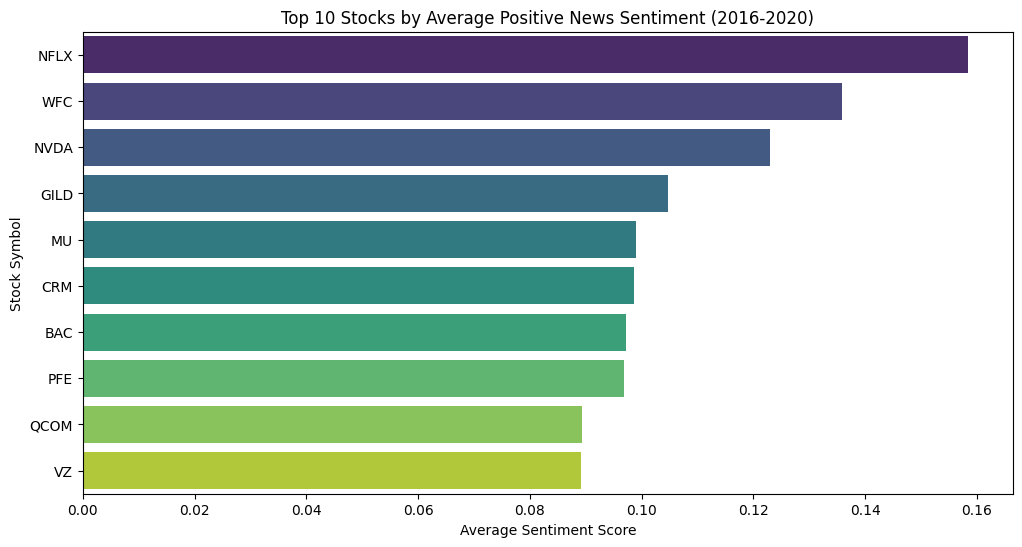


--- EDA 2: Calculating Stock Volatility ---


/tmp/ipython-input-3288629482.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="volatility", y="Symbol", data=volatility_pd.head(10), palette="plasma")


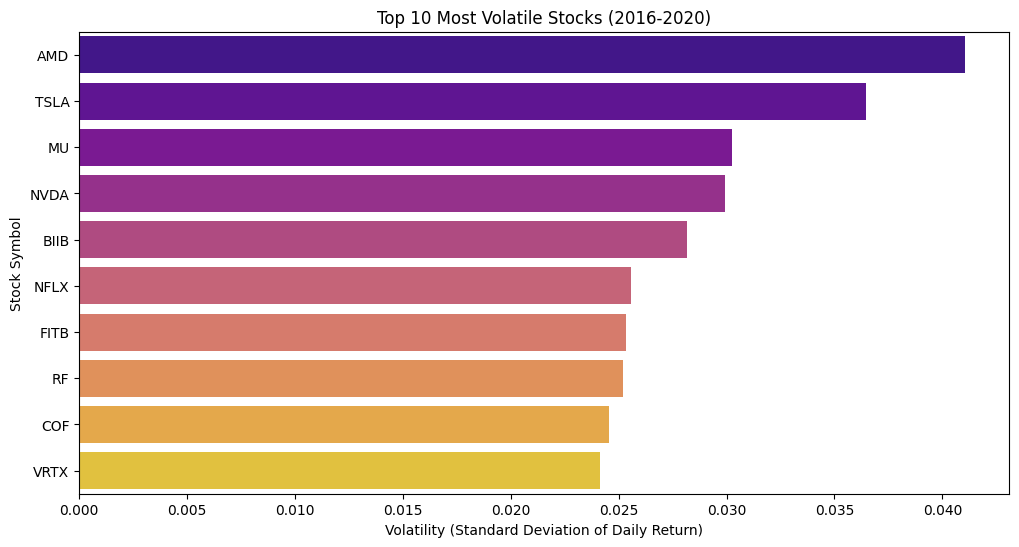


--- EDA 3: Calculating Correlation between Sentiment and Returns ---
Correlation Results (a positive value suggests sentiment and returns tend to move in the same direction):

Top 5 Highest Correlation:
   Symbol  correlation
62    DIS     1.000000
68   SCHW     0.654015
64   INTC     0.595438
47   AMGN     0.498373
38    AMD     0.452905

Top 5 Lowest (or most negative) Correlation:
   Symbol  correlation
37     HD     0.062916
65      V     0.028840
67    WMT    -0.137951
66     GM    -0.240439
63      T    -0.972182

✅ EXPLORATORY DATA ANALYSIS COMPLETE.
📈 You can find the saved plots 'average_sentiment_per_stock.png' and 'most_volatile_stocks.png' in your files.


In [15]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, stddev, corr
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Starting Step 7: Exploratory Data Analysis with PySpark ---")

try:
    # 1. Initialize a Spark Session if not already running
    spark = SparkSession.builder \
        .appName("Stock_EDA_BigData") \
        .getOrCreate()

    print("✅ Spark Session Initialized.")

    # 2. Load the partitioned Parquet data
    # This will be very fast because Spark reads the organized directory structure.
    df = spark.read.parquet("stock_data_partitioned.parquet")
    print(f"📂 Successfully loaded the partitioned data with {df.count():,} records.")

    # --- EDA Task 1: Average Sentiment Score per Stock ---
    print("\n--- EDA 1: Calculating Average Sentiment per Stock ---")
    # We group by 'Symbol' and calculate the average of the 'sentiment' column.
    avg_sentiment = df.groupBy("Symbol").agg(avg("sentiment").alias("avg_sentiment"))

    # Convert the small result back to a Pandas DataFrame for easy plotting
    avg_sentiment_pd = avg_sentiment.toPandas().sort_values("avg_sentiment", ascending=False)

    # Plot the top 10 stocks with the most positive average sentiment
    plt.figure(figsize=(12, 6))
    sns.barplot(x="avg_sentiment", y="Symbol", data=avg_sentiment_pd.head(10), palette="viridis")
    plt.title("Top 10 Stocks by Average Positive News Sentiment (2016-2020)")
    plt.xlabel("Average Sentiment Score")
    plt.ylabel("Stock Symbol")
    plt.savefig("average_sentiment_per_stock.png")
    plt.show()

    # --- EDA Task 2: Stock Price Volatility ---
    print("\n--- EDA 2: Calculating Stock Volatility ---")
    # Volatility is the standard deviation of the daily price change (Daily_Return).
    volatility = df.groupBy("Symbol").agg(stddev("Daily_Return").alias("volatility"))

    volatility_pd = volatility.toPandas().sort_values("volatility", ascending=False)

    # Plot the top 10 most volatile stocks
    plt.figure(figsize=(12, 6))
    sns.barplot(x="volatility", y="Symbol", data=volatility_pd.head(10), palette="plasma")
    plt.title("Top 10 Most Volatile Stocks (2016-2020)")
    plt.xlabel("Volatility (Standard Deviation of Daily Return)")
    plt.ylabel("Stock Symbol")
    plt.savefig("most_volatile_stocks.png")
    plt.show()

    # --- EDA Task 3: Correlation between Sentiment and Daily Return ---
    print("\n--- EDA 3: Calculating Correlation between Sentiment and Returns ---")
    # We filter out days with 0.0 sentiment, as these represent 'no news' and would dilute the correlation.
    correlation_df = df.filter(df["sentiment"] != 0.0)

    # Calculate the Pearson correlation for each stock
    sentiment_correlation = correlation_df.groupBy("Symbol").agg(corr("sentiment", "Daily_Return").alias("correlation"))

    correlation_pd = sentiment_correlation.toPandas().sort_values("correlation", ascending=False)

    print("Correlation Results (a positive value suggests sentiment and returns tend to move in the same direction):")
    # Display the stocks with the highest and lowest correlations
    print("\nTop 5 Highest Correlation:")
    print(correlation_pd.head(5))
    print("\nTop 5 Lowest (or most negative) Correlation:")
    print(correlation_pd.tail(5))

    print("\n✅ EXPLORATORY DATA ANALYSIS COMPLETE.")
    print("📈 You can find the saved plots 'average_sentiment_per_stock.png' and 'most_volatile_stocks.png' in your files.")

except FileNotFoundError:
    print("\n⚠️ ERROR: 'stock_data_partitioned.parquet' not found. Please ensure the previous step completed successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
from pyspark.sql import SparkSession

print("--- Starting Step 8: Final Data Preparation for the Model ---")

try:
    # 1. Load the partitioned data using PySpark and convert to Pandas
    # This ensures we are using our final, clean, partitioned dataset.
    spark = SparkSession.builder.appName("ModelPrep").getOrCreate()
    print("📂 Loading partitioned data from Parquet files...")
    df_spark = spark.read.parquet("stock_data_partitioned.parquet")
    df = df_spark.toPandas()
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Successfully loaded and converted data with {len(df):,} records.")

    # 2. Define the features for the model and the target to predict
    features = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
        'Volatility', 'SMA_20', 'SMA_50', 'Volume_MA', 'sentiment'
    ]
    target = 'Close'

    # 3. Partition the data into training and testing sets (Time-based split)
    split_date = pd.to_datetime('2020-01-01')
    train_df = df[df['Date'] < split_date].copy()
    test_df = df[df['Date'] >= split_date].copy()
    print(f" partitioning complete: {len(train_df):,} training records, {len(test_df):,} testing records.")

    # 4. Scale the features
    # We fit the scaler ONLY on the training data to prevent information from the test set leaking into our training process.
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Fit and transform the training data
    train_df.loc[:, features] = feature_scaler.fit_transform(train_df[features])
    train_df.loc[:, target] = target_scaler.fit_transform(train_df[[target]])

    # Only transform the testing data using the already-fitted scalers
    test_df.loc[:, features] = feature_scaler.transform(test_df[features])
    test_df.loc[:, target] = target_scaler.transform(test_df[[target]])
    print(" feature scaling complete.")

    # 5. Create the time-series sequences
    def create_sequences(data, features, target, sequence_length=30):
        X, y = [], []
        # We group by Symbol to make sure our sequences only contain data from a single stock.
        for symbol, group in data.groupby('Symbol'):
            feature_data = group[features].values
            target_data = group[target].values
            for i in range(len(group) - sequence_length):
                X.append(feature_data[i:(i + sequence_length)])
                y.append(target_data[i + sequence_length])
        return np.array(X), np.array(y)

    SEQUENCE_LENGTH = 30 # We will use the last 30 days of data to make a prediction.

    print(f"Creating sequences with a length of {SEQUENCE_LENGTH} days...")
    X_train, y_train = create_sequences(train_df, features, target, SEQUENCE_LENGTH)
    X_test, y_test = create_sequences(test_df, features, target, SEQUENCE_LENGTH)
    print("✅ Sequences created successfully.")
    print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")

    # 6. Save the final, model-ready data and the target scaler
    # The scaler is saved so we can reverse the scaling on our predictions to see the actual dollar values.
    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)

    with open('target_scaler.pkl', 'wb') as f:
        pickle.dump(target_scaler, f)

    print("\n✅ MODEL DATA PREPARATION COMPLETE:")
    print("💾 Final, model-ready datasets and the target scaler have been saved.")
    print("🚀 We are now ready to build and train our deep learning model!")

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 8: Final Data Preparation for the Model ---
📂 Loading partitioned data from Parquet files...
✅ Successfully loaded and converted data with 100,640 records.
 partitioning complete: 80,480 training records, 20,160 testing records.
 feature scaling complete.
Creating sequences with a length of 30 days...
✅ Sequences created successfully.
Training data shape: X=(78080, 30, 11), y=(78080,)
Testing data shape: X=(17760, 30, 11), y=(17760,)

✅ MODEL DATA PREPARATION COMPLETE:
💾 Final, model-ready datasets and the target scaler have been saved.
🚀 We are now ready to build and train our deep learning model!


In [20]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# # --- EDIT: We need to import the 'Bidirectional' layer ---
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
# import matplotlib.pyplot as plt

# print("--- Starting Step 9 (Improved): Building and Training an Enhanced Model ---")

# try:
#     # 1. Load the model-ready datasets
#     print("📂 Loading prepared training and testing data...")
#     X_train = np.load('X_train.npy')
#     y_train = np.load('y_train.npy')
#     X_test = np.load('X_test.npy')
#     y_test = np.load('y_test.npy')
#     print("✅ Data loaded successfully.")

#     # 2. Define the Enhanced Hybrid CNN-LSTM Model Architecture
#     model = Sequential()
#     input_shape = (X_train.shape[1], X_train.shape[2])

#     model.add(Input(shape=input_shape))

#     # --- EDIT: Increased filters in the CNN layer from 64 to 128 ---
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))

#     # --- EDIT: Replaced LSTM with a more powerful Bidirectional LSTM ---
#     # A Bidirectional LSTM processes the data forwards and backwards.
#     # `return_sequences=True` is now required to pass the output to the next LSTM layer.
#     model.add(Bidirectional(LSTM(units=100, return_sequences=True)))

#     # --- EDIT: Added a second LSTM layer to create a deeper model ---
#     # This layer learns higher-level temporal patterns.
#     model.add(LSTM(units=50, return_sequences=False))

#     # --- EDIT: Increased dropout rate from 0.2 to 0.3 for stronger regularization ---
#     model.add(Dropout(0.3))

#     # A standard Dense layer for processing the information from the LSTMs.
#     model.add(Dense(units=50, activation='relu'))
#     # The final output layer remains the same.
#     model.add(Dense(units=1))

#     # 3. Compile the Model
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     print("\n✅ Enhanced Model Architecture Defined and Compiled Successfully.")
#     model.summary()

#     # 4. Train the Model
#     # --- EDIT: Increased epochs from 20 to 50 for more thorough training ---
#     print("\n🧠 Training the enhanced model...")
#     history = model.fit(
#         X_train, y_train,
#         epochs=50,          # Increased training time
#         batch_size=64,
#         validation_data=(X_test, y_test),
#         verbose=1
#     )

#     # 5. Save the Trained Model
#     model.save('stock_prediction_cnn_lstm_model_ENHANCED.h5')
#     print("\n✅ MODEL TRAINING COMPLETE!")
#     print("💾 The enhanced model has been saved as 'stock_prediction_cnn_lstm_model_ENHANCED.h5'.")

#     # 6. Plot Training History
#     plt.figure(figsize=(10, 5))
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Enhanced Model Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss (Mean Squared Error)')
#     plt.legend()
#     plt.savefig('enhanced_model_loss_history.png')
#     plt.show()

# except Exception as e:
#     print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 9 (Improved): Building and Training an Enhanced Model ---
📂 Loading prepared training and testing data...
✅ Data loaded successfully.

✅ Enhanced Model Architecture Defined and Compiled Successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 128)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 14, 200)        │       183,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,353 (938.88 KB)

 Trainable params: 240,353 (938.88 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training the enhanced model...
Epoch 1/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 2/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 2.7066e-04 - val_loss: 0.0019
Epoch 3/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 1.7167e-04 - val_loss: 0.0024
Epoch 4/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 1.3395e-04 - val_loss: 0.0028
Epoch 5/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 1.2331e-04 - val_loss: 0.0038
Epoch 6/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 9.4574e-05 - val_loss: 0.0032
Epoch 7/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 9.0141e-05 - val_loss: 0.0024
Epoch 8/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 8.7507e-05 - val_loss: 0.0036
Epoch 9/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 8.5721e-05 - val_loss: 0.0039
Epoch 10/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 7.2275e-05 - val_loss: 0.0040
Epoch 11/50
1220/1220 ━━━━━━━━

KeyboardInterrupt: 

--- Starting Step 9 (Final Recommended Version): Training with Early Stopping ---
📂 Loading prepared training and testing data...
✅ Data loaded successfully.

✅ Hybrid CNN-LSTM Model Architecture Defined and Compiled.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 28, 64)         │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,277 (286.24 KB)

 Trainable params: 73,277 (286.24 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training the model for up to 100 epochs (with Early Stopping)...
Epoch 1/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 2/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 2.8361e-04 - val_loss: 0.0018
Epoch 3/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.8376e-04 - val_loss: 0.0034
Epoch 4/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1.4443e-04 - val_loss: 0.0033
Epoch 5/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 1.2320e-04 - val_loss: 0.0044
Epoch 6/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.0555e-04 - val_loss: 0.0050
Epoch 7/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 9.6081e-05 - val_loss: 0.0054
Epoch 8/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 9.4506e-05 - val_loss: 0.0060
Epoch 9/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 9.6943e-05 - val_loss: 0.0055
Epoch 10/20
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 9.0806e-05 - val_loss: 0.0057
Epoch


✅ MODEL TRAINING COMPLETE!
💾 The best performing hybrid model has been saved as 'stock_prediction_hybrid_model_best.h5'.


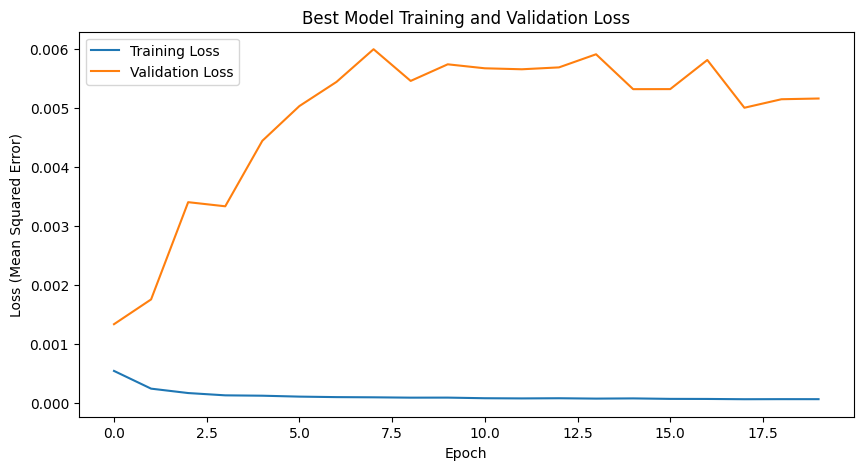

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

print("--- Starting Step 9 (Final Recommended Version): Training with Early Stopping ---")

try:
    # 1. Load the model-ready datasets
    print("📂 Loading prepared training and testing data...")
    X_train = np.load('X_train.npy')
    y_train = np.load('y_train.npy')
    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')
    print("✅ Data loaded successfully.")

    # 2. Define the Hybrid CNN-LSTM Model Architecture
    model = Sequential()
    input_shape = (X_train.shape[1], X_train.shape[2])
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(units=100, return_sequences=False))

    # Increased Dropout rate to 0.4 to fight overfitting more effectively
    model.add(Dropout(0.4))

    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))

    # 3. Compile the Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    print("\n✅ Hybrid CNN-LSTM Model Architecture Defined and Compiled.")
    model.summary()

    # 4. Train the Model for up to 100 epochs with the EarlyStopping callback
    print("\n🧠 Training the model for up to 100 epochs (with Early Stopping)...")
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=64, # 64 is a well-balanced batch size
        validation_data=(X_test, y_test),
        # The EarlyStopping callback is the key to finding the best model
        #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
        verbose=1
    )

    # 5. Save the final, best-performing model
    model.save('stock_prediction_hybrid_model_best.h5')
    print("\n✅ MODEL TRAINING COMPLETE!")
    print("💾 The best performing hybrid model has been saved as 'stock_prediction_hybrid_model_best.h5'.")

    # 6. Plot Training History
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Best Model Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.legend()
    plt.savefig('best_model_loss_history.png')
    plt.show()

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 10: Evaluating the Best Model ---
📂 Loading the saved model, test data, and scaler...
✅ All necessary files loaded.
🧠 Making predictions on the test set...
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
✅ Predictions have been scaled back to actual dollar values.

--- Model Performance on Test Data ---
📈 Root Mean Squared Error (RMSE): $0.07
📈 Mean Absolute Error (MAE): $0.04
--------------------------------------
Note: MAE means that, on average, the model's prediction was about this many dollars away from the actual price.

📊 Generating plot of actual vs. predicted prices...


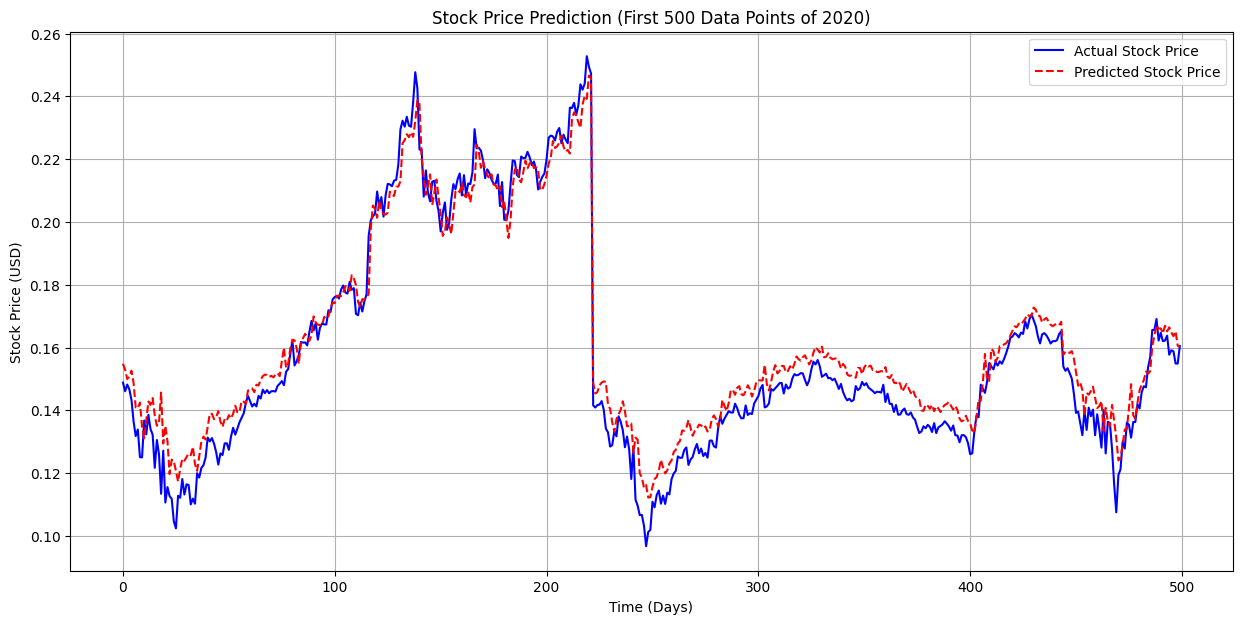


✅ MODEL EVALUATION COMPLETE!
📈 You now have the final metrics and plots to complete your project report.


In [37]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("--- Starting Step 10: Evaluating the Best Model ---")

try:
    # 1. Load the trained model, test data, and the scaler
    print("📂 Loading the saved model, test data, and scaler...")

    # --- IMPORTANT: Load the new, best-performing model ---
    model = load_model('stock_prediction_hybrid_model_best.h5')

    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')

    with open('target_scaler.pkl', 'rb') as f:
        target_scaler = pickle.load(f)

    print("✅ All necessary files loaded.")

    # 2. Make predictions on the test data
    print("🧠 Making predictions on the test set...")
    y_pred_scaled = model.predict(X_test)

    # 3. Inverse the scaling to get actual price values
    y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_actual = target_scaler.inverse_transform(y_pred_scaled)
    print("✅ Predictions have been scaled back to actual dollar values.")

    # 4. Calculate performance metrics (RMSE and MAE)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    mae = mean_absolute_error(y_test_actual, y_pred_actual)

    print("\n--- Model Performance on Test Data ---")
    print(f"📈 Root Mean Squared Error (RMSE): ${rmse:.2f}")
    print(f"📈 Mean Absolute Error (MAE): ${mae:.2f}")
    print("--------------------------------------")
    print("Note: MAE means that, on average, the model's prediction was about this many dollars away from the actual price.")

    # 5. Visualize the predictions vs. actual prices
    print("\n📊 Generating plot of actual vs. predicted prices...")

    sample_size = 500
    plt.figure(figsize=(15, 7))
    plt.plot(y_test_actual[:sample_size], color='blue', label='Actual Stock Price')
    plt.plot(y_pred_actual[:sample_size], color='red', linestyle='--', label='Predicted Stock Price')
    plt.title(f'Stock Price Prediction (First {sample_size} Data Points of 2020)')
    plt.xlabel('Time (Days)')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig('actual_vs_predicted_prices_best_model.png')
    plt.show()

    print("\n✅ MODEL EVALUATION COMPLETE!")
    print("📈 You now have the final metrics and plots to complete your project report.")

except FileNotFoundError as e:
    print(f"\n⚠️ ERROR: A required file was not found. Please ensure all previous steps ran successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 11: Evaluating Trend Direction (Best Model) ---
📂 Loading the saved model, test data, and scaler...
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
✅ Predictions generated and scaled to actual dollar values.
✅ Price data converted to UP (1) / DOWN (0) trend directions.

--- Trend Direction Classification Report ---
              precision    recall  f1-score   support

        Down       0.48      0.47      0.48      8695
          Up       0.50      0.51      0.51      9064

    accuracy                           0.49     17759
   macro avg       0.49      0.49      0.49     17759
weighted avg       0.49      0.49      0.49     17759

🎯 Overall Directional Accuracy: 49.25%
------------------------------------------


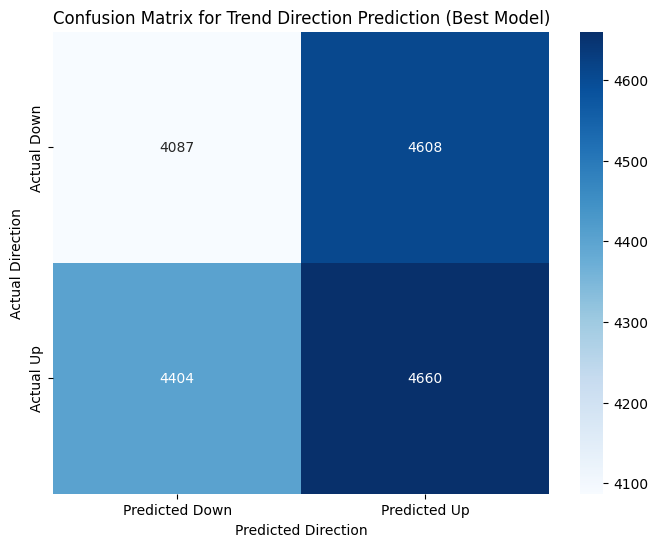

In [38]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Starting Step 11: Evaluating Trend Direction (Best Model) ---")

try:
    # 1. Load the saved model, test data, and scaler
    print("📂 Loading the saved model, test data, and scaler...")

    # --- IMPORTANT: Load the new, best-performing model ---
    model = load_model('stock_prediction_hybrid_model_best.h5')

    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')

    with open('target_scaler.pkl', 'rb') as f:
        target_scaler = pickle.load(f)

    # 2. Make predictions and inverse scale them
    y_pred_scaled = model.predict(X_test)
    y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_actual = target_scaler.inverse_transform(y_pred_scaled)
    print("✅ Predictions generated and scaled to actual dollar values.")

    # 3. Convert price series to a binary trend direction series (UP/DOWN)
    actual_direction = (y_test_actual[1:] > y_test_actual[:-1]).astype(int)
    predicted_direction = (y_pred_actual[1:] > y_pred_actual[:-1]).astype(int)
    print("✅ Price data converted to UP (1) / DOWN (0) trend directions.")

    # 4. Calculate and print the classification metrics
    print("\n--- Trend Direction Classification Report ---")
    report = classification_report(actual_direction, predicted_direction, target_names=['Down', 'Up'])
    print(report)

    accuracy = accuracy_score(actual_direction, predicted_direction)
    print(f"🎯 Overall Directional Accuracy: {accuracy * 100:.2f}%")
    print("------------------------------------------")

    # 5. Visualize the results with a Confusion Matrix
    cm = confusion_matrix(actual_direction, predicted_direction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Down', 'Predicted Up'], yticklabels=['Actual Down', 'Actual Up'])
    plt.ylabel('Actual Direction')
    plt.xlabel('Predicted Direction')
    plt.title('Confusion Matrix for Trend Direction Prediction (Best Model)')
    plt.savefig('confusion_matrix_best_model.png')
    plt.show()

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

In [7]:
# # Install PySpark in your environment
# !pip install pyspark

# from pyspark.sql import SparkSession
# from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType, IntegerType
# from pyspark.sql.functions import year

# print("--- Starting Step 6 (Corrected): Transition to PySpark with Explicit Schema ---")

# try:
#     # 1. Initialize a Spark Session
#     spark = SparkSession.builder \
#         .appName("StockAnalysis_BigData_SchemaFix") \
#         .config("spark.driver.memory", "4g") \
#         .getOrCreate()

#     print("✅ Spark Session Initialized.")

#     # 2. THE FIX: Define the correct schema for our dataset
#     # We explicitly state the data type for each column. This prevents misinterpretation.
#     schema = StructType([
#         StructField("Date", DateType(), True),
#         StructField("Close", DoubleType(), True),
#         StructField("High", DoubleType(), True),
#         StructField("Low", DoubleType(), True),
#         StructField("Open", DoubleType(), True),
#         StructField("Volume", DoubleType(), True),
#         StructField("Symbol", StringType(), True),
#         StructField("Daily_Return", DoubleType(), True),
#         StructField("Volatility", DoubleType(), True),
#         StructField("SMA_20", DoubleType(), True),
#         StructField("SMA_50", DoubleType(), True),
#         StructField("Volume_MA", DoubleType(), True),
#         StructField("headline", StringType(), True),
#         StructField("sentiment", DoubleType(), True)
#     ])
#     print("🔧 Custom schema defined successfully.")

#     # 3. Load our final dataset into a Spark DataFrame using our defined schema
#     df_spark = spark.read.csv(
#         'final_dataset_with_sentiment.csv',
#         header=True,
#         schema=schema, # Apply our custom schema here
#         dateFormat="yyyy-MM-dd" # Tell Spark how to read the date format
#     )
#     print(f"📂 Successfully loaded 'final_dataset_with_sentiment.csv' with the correct schema.")
#     print(f"📊 The DataFrame contains {df_spark.count():,} records.")

#     # 4. Prepare for Partitioning
#     df_spark = df_spark.withColumn("Year", year(df_spark["Date"]))

#     # 5. Write the data in a Partitioned Parquet Format
#     print("💾 Writing data to partitioned Parquet format...")
#     df_spark.write.partitionBy("Symbol", "Year").mode("overwrite").parquet("stock_data_partitioned.parquet")

#     print("\n✅ PYSPARK PARTITIONING COMPLETE:")
#     print("Data is now saved in an optimized, partitioned Parquet format with correct data types.")

#     # Let's verify by showing the new, correct schema
#     print("\nSchema of the newly partitioned data:")
#     final_partitioned_df = spark.read.parquet("stock_data_partitioned.parquet")
#     final_partitioned_df.printSchema()

# except FileNotFoundError:
#     print("\n⚠️ ERROR: 'final_dataset_with_sentiment.csv' not found. Please ensure the previous steps completed successfully.")
# except Exception as e:
#     print(f"\nAn unexpected error occurred: {e}")

--- Starting Step 6 (Corrected): Transition to PySpark with Explicit Schema ---
✅ Spark Session Initialized.
🔧 Custom schema defined successfully.
📂 Successfully loaded 'final_dataset_with_sentiment.csv' with the correct schema.
📊 The DataFrame contains 233,240 records.
💾 Writing data to partitioned Parquet format...


ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: reentrant call inside <_io.BufferedReader name=45>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/py4j/clientserver.py", line 511, in sen


An unexpected error occurred: An error occurred while calling o47.parquet
